In [1]:
#retrival augmented generations
import os
from dotenv import load_dotenv
load_dotenv()

True

Steps:

1) Read all documents
2) convert those documents to vectors


In [3]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

documents = SimpleDirectoryReader('data/').load_data()

In [4]:
len(documents)

47

In [5]:
# step 2 : convert documents into vectors

index = VectorStoreIndex.from_documents(documents, show_progress=True)

d:\Python\Langchain Projects\llmvenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating embeddings: 100%|██████████| 47/47 [00:01<00:00, 33.84it/s]


In [6]:
# index is basically vector store i.e. word embeddings
index

In [7]:
query_engine = index.as_query_engine()

In [8]:
query_engine

In [9]:
response=query_engine.query("What is Strategy for ‘Amrit Kaal’? ")

In [10]:
from llama_index.core.response.pprint_utils import pprint_response

pprint_response(response, show_source= True)

Final Response: The strategy for 'Amrit Kaal' involves adopting
economic policies that foster and sustain growth, facilitate inclusive
and sustainable development, improve productivity, create
opportunities for all, help enhance capabilities, and contribute to
the generation of resources to power investments and fulfill
aspirations. It also includes guiding principles of 'Reform, Perform,
and Transform', taking up next-generation reforms, building consensus
with states and stakeholders for effective implementation, ensuring
timely and adequate finances, relevant technologies, and appropriate
training for Micro, Small, and Medium Enterprises (MSME), and
orienting the regulatory environment to facilitate their growth.
Additionally, aligning with the 'Panchamrit' goals to sustain high and
more resource-efficient economic growth is part of the strategy.
______________________________________________________________________
Source Node 1/2
Node ID: d3d27ea0-cb84-4e01-8e1e-e3fa62a22eb3
Simil

In [11]:
from llama_index.core.retrievers import VectorIndexRetriever

from llama_index.core.query_engine import RetrieverQueryEngine

from llama_index.core.indices.postprocessor import SimilarityPostprocessor 

retriever = VectorIndexRetriever(index = index ,similarity_top_k = 5)

query_engine = RetrieverQueryEngine(retriever = retriever)


In [12]:
response = query_engine.query("what is transformers?")

In [13]:
pprint_response(response, show_source=True)

Final Response: The Transformer is a model architecture that relies
entirely on an attention mechanism to draw global dependencies between
input and output, without using recurrent layers or convolutions. It
consists of stacked self-attention and point-wise, fully connected
layers for both the encoder and decoder. The encoder is composed of a
stack of identical layers with multi-head self-attention and feed-
forward networks, while the decoder includes an additional sub-layer
for multi-head attention over the encoder output. The attention
function in the Transformer maps a query and key-value pairs to an
output through a weighted sum mechanism.
______________________________________________________________________
Source Node 1/5
Node ID: f3a0f026-0b84-4334-b997-cb87b3f6ed41
Similarity: 0.7896638543256678
Text: 1 Introduction Recurrent neural networks, long short-term memory
[ 13] and gated recurrent [ 7] neural networks in particular, have
been firmly established as state of the art a

In [18]:
postprocessor = SimilarityPostprocessor( similarity_cutoff=0.70)

query_engine = RetrieverQueryEngine(retriever=retriever,
                                     node_postprocessors=[postprocessor])

In [19]:
response = query_engine.query("what is transformers?")
pprint_response(response, show_source=True)

Final Response: The Transformer is a model architecture that relies
entirely on an attention mechanism to draw global dependencies between
input and output, without using recurrent layers commonly found in
encoder-decoder architectures. It is designed to reduce sequential
computation and improve parallelization, allowing for faster training
compared to architectures based on recurrent or convolutional layers.
The Transformer has shown superior performance in tasks like machine
translation, achieving state-of-the-art results with significantly
less training time and cost.
______________________________________________________________________
Source Node 1/5
Node ID: f3a0f026-0b84-4334-b997-cb87b3f6ed41
Similarity: 0.7896638543256678
Text: 1 Introduction Recurrent neural networks, long short-term memory
[ 13] and gated recurrent [ 7] neural networks in particular, have
been firmly established as state of the art approaches in sequence
modeling and transduction problems such as language m

In below section, will create vector store or embeddings and stored them into local space(disk) instead of memory. so evrytime whenevr will query it will search into disk rather than memory.

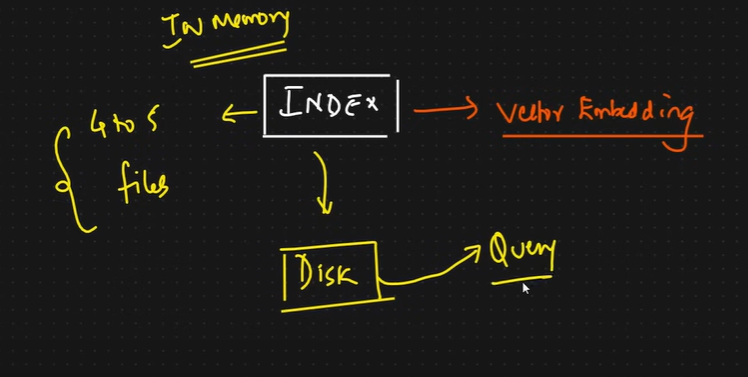

In [23]:
import os.path

from llama_index.core import (
    VectorStoreIndex,
    SimpleDirectoryReader,
    StorageContext,
    load_index_from_storage,
)


#chcek if storage exists already

PERSIST_DIR = './storage'

if not os.path.exists(PERSIST_DIR):
    #load documents and create index

    # step 1: load documents
    documents = SimpleDirectoryReader('data/').load_data()
    #step 2: creat index or embedings
    index = VectorStoreIndex.from_documents(documents)
    #step 3: persist index / store it for later
    index.storage_context.persist(persist_dir=PERSIST_DIR)
else:
    #load existing index from disk
    storage_context = StorageContext.from_defaults(persist_dir=PERSIST_DIR)
    index = load_index_from_storage(storage_context)



#either way query the index
query_engine = index.as_query_engine()
response = query_engine.query('what is the transformers?')
pprint_response(response)


Final Response: The Transformer is a model architecture that relies
entirely on an attention mechanism to establish global dependencies
between input and output, eliminating the need for recurrence. This
approach allows for increased parallelization during training, leading
to improved computational efficiency. The Transformer has shown
significant advancements in translation quality and outperforms models
based on recurrent or convolutional layers in terms of training speed
and performance on various tasks.
